# 1. Phân tích dữ liệu

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import PercentFormatter
warnings.filterwarnings('ignore')

### Đọc dữ liệu

In [2]:
df = pd.read_csv('../data/data_after_collect.csv', sep='\t')
df.head(5)

,id,name,overview,certificate,runtime,nvote,imdb_rate,director,cast,genre,keyword,release_date,country,language,location,company,budget,gross
0,tt1375666,Kẻ Đánh Cắp Giấc Mơ,A thief who steals corporate secrets through t...,PG-13,148.0,2356036,8.8,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","Action, Adventure, Sci-Fi, Thriller","dream,ambiguous ending,subconscious,mindbender...","August 6, 2010 (Vietnam)","United States, United Kingdom","English, Japanese, French","Fortress Mountain, Kananaskis Country, Alberta...","Warner Bros., Legendary Entertainment, Syncopy","$160,000,000","$836,848,102"
1,tt0816692,Hố Đen Tử Thần,A team of explorers travel through a wormhole ...,C13,169.0,1835446,8.6,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...","Adventure, Drama, Sci-Fi","astronaut,saving the world,space travel,wormho...","November 7, 2014 (Vietnam)","United States, United Kingdom, Canada",English,Iceland,"Paramount Pictures, Warner Bros., Legendary En...","$165,000,000","$773,867,216"
2,tt1345836,Kỵ Sĩ Bóng Đêm Trỗi Dậy,Eight years after the Joker's reign of anarchy...,PG-13,164.0,1707832,8.4,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway, Gary...","Action, Drama","dc comics,batman character,bruce wayne charact...","July 27, 2012 (Vietnam)","United States, United Kingdom","English, Arabic","Mehrangarh Fort, Jodhpur, Rajasthan, India","Warner Bros., Legendary Entertainment, DC Ente...","$250,000,000","$1,081,169,825"
3,tt1853728,Hành Trình Django,"With the help of a German bounty-hunter, a fre...",R,165.0,1557694,8.4,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...","Drama, Western","slavery,racial vengeance,racial violence,ku kl...","March 15, 2013 (Vietnam)",United States,"English, German, French, Italian","Evergreen Plantation, 4677 Highway 18, Edgard,...","The Weinstein Company, Columbia Pictures","$100,000,000","$426,074,373"
4,tt0993846,Sói Già Phố Wall,"Based on the true story of Jordan Belfort, fro...",R,180.0,1414845,8.2,Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie, ...","Biography, Comedy, Crime, Drama","based on true story,stockbroker,debauchery,ext...","January 11, 2014 (Vietnam)",United States,"English, French","Portofino, Genoa, Liguria, Italy","Red Granite Pictures, Appian Way, Sikelia Prod...","$100,000,000","$406,878,233"


In [3]:
df = df.head(1500)

# 2. Đặt câu hỏi

### Câu hỏi 1: Xu hướng phim những năm gần đây là gì?

**Mô tả câu hỏi**: Xu hướng thể loại của các bộ phim thay đổi theo từng năm. Vậy xu hướng phim những năm gần đây là gì ?

**Lợi ích**: Các nhà làm phim sản xuất theo đúng xu hướng thể loại, giúp họ đạt được thành công nhất định. 

#### Tiền xử lý

Thêm cột `year` dựa vào cột `release_date` để phân tích các bộ phim theo năm

In [28]:
df['year'] = df['release_date'].apply(lambda x: x.year)

#### Trả lời câu hỏi

- Bước 1: Lấy ra tất cả phim trong 2 năm gần nhất 
- Bước 2: Phân tích trên bộ dữ liệu ở bước 1
- Bước 3: Tìm hiểu nguyên nhân phổ biến của các thể loại
- Bước 4: Thể loại nào đang trở nên phổ biến hơn và thể loại nào đang dần bị lạc hậu

##### Step 1: Lấy ra tất cả phim trong 2 năm gần nhất 

In [29]:
current_year = 2021
movies_last_2y = df[(df['year'] == current_year) | (df['year'] == current_year - 1)]

movies_last_2y = movies_last_2y

In [30]:
movies_last_2y.sample(n=5)

,id,name,overview,certificate,runtime,nvote,imdb_rate,director,cast,genre,keyword,release_date,country,language,location,company,budget,gross,year
1142,tt3661210,Cuộc Khai Quật,An archaeologist embarks on the historically i...,C16,112.0,76083,7.1,[Simon Stone],"[Carey Mulligan, Ralph Fiennes, Lily James, Jo...","[Biography, Drama, History]","[discovery, archeological dig, boat, airplane,...",2021-01-29,United Kingdom,[English],"[Shackleford, Surrey, England, UK]","[Netflix, Magnolia Mae Films, Clerkenwell Films]",NaN,0.000693,2021
428,tt8936646,Tyler Rake: Nhiệm Vụ Giải Cứu,"Tyler Rake, a fearless black market mercenary,...",C18,116.0,205762,6.7,[Sam Hargrave],"[Chris Hemsworth, Bryon Lerum, Ryder Lerum, Ru...","[Action, Thriller]","[drug dealers, kidnapping, child kidnapping, f...",2020-04-24,United States,"[English, Hindi, Bengali]","[Dhaka, Bangladesh]","[Netflix, AGBO, T.G.I.M Films]",65.0,NaN,2020
436,tt15097216,Jai Bhim,When a tribal man is arrested for a case of al...,Unrate,164.0,202791,8.8,[T.J. Gnanavel],"[Suriya, Lijo Mol Jose, Manikandan K., Rajisha...","[Crime, Drama, Mystery]","[lawyer, courtroom, poverty, human rights, jus...",2021-11-02,India,"[Tamil, Hindi, Telugu]",NaN,[2D Entertainment],NaN,NaN,2021
838,tt8721424,"tick, tick... BOOM! Giai Điệu Cuộc Sống","On the cusp of his 30th birthday, a promising ...",C13,120.0,107342,7.5,[Lin-Manuel Miranda],"[Andrew Garfield, Alexandra Shipp, Robin de Je...","[Biography, Comedy, Drama, Musical]","[30th birthday, 29 year old man, composer, the...",2021-11-19,United States,[English],"[New York City, New York, USA]","[5000 Broadway Productions, Imagine Entertainm...",55.0,0.112777,2021
1230,tt9347730,Sát Nhân Trong Gương,A sequel to the horror film Sát Nhân Trong Gươ...,R,91.0,66951,5.9,[Nia DaCosta],"[Yahya Abdul-Mateen II, Teyonah Parris, Nathan...","[Horror, Thriller]","[african american, bee, hook, slasher killer, ...",2021-08-27,"Canada, United States","[English, Ukrainian, French]","[DeKalb, Illinois, USA]","[Universal Pictures, Metro-Goldwyn-Mayer (MGM)...",22.0,77.411570,2021


##### Step 2: Phân tích trên bộ dữ liệu ở step 1

Sau khi thực hiện xong lấy được các bộ phim hai năm gần nhất. Ta trực quan hóa để quan sát

In [31]:
genres = movies_last_2y['genre'].explode()
genres_count = genres.value_counts()

In [32]:
#count number of each genre and deduce percent
sum_all = genres_count.sum()
genres_percent = genres_count.apply(lambda x : x*100/sum_all)

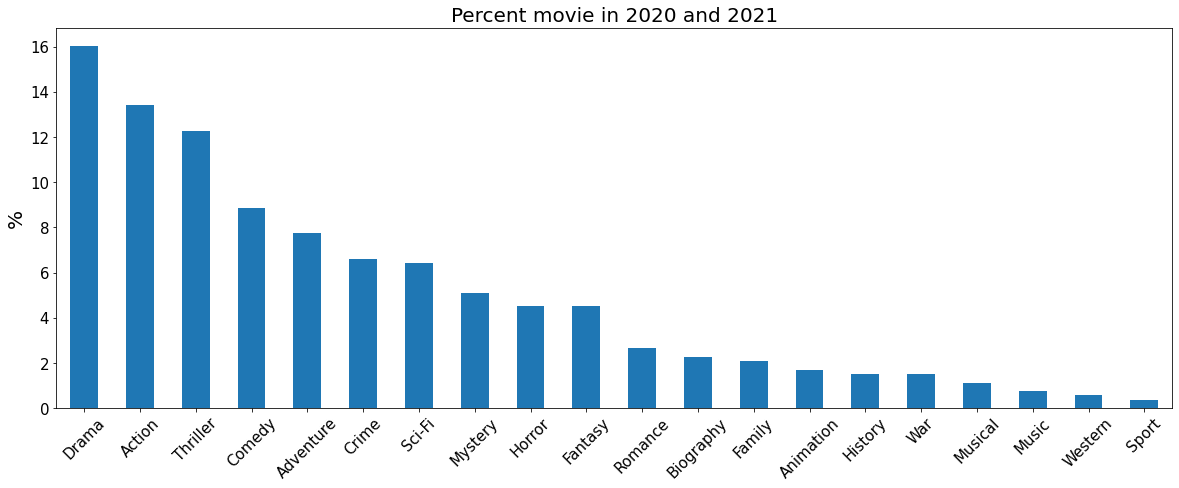

In [33]:
#visualize percent of each genre

plt.figure(figsize=(20,7))

barlist = genres_percent.plot.bar()
plt.ylabel('%',fontsize = 20,rotation=90)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15,rotation = 45)
plt.title('Percent movie in 2020 and 2021',fontsize=20)

plt.show()

Các thể loại `Drama`, `Action`, `Thriller` nhiều hơn hẵn so với các thể loại khác. Cùng đi đến bước 3 để tìm hiểu thêm

##### Step 3: Tìm hiểu tại sao thể loại đó lại phổ biến

- `Drama` và `Action` là một tiêu chuẩn rộng, hầu hết các bộ phim đều có tính chất drama. 

In [34]:
count_genre = df['genre'].value_counts().reset_index().rename(columns={'index': 'genre','genre': 'total'} )
count_genre['genre'] = count_genre['genre'].apply(lambda x : ' '.join(x))
count_genre

,genre,total
0,Comedy Drama Romance,53
1,Action Adventure Sci-Fi,51
2,Comedy Drama,41
3,Comedy,38
4,Drama,38
...,...,...
450,Comedy Horror Mystery,1
451,Biography Drama History Thriller War,1
452,Action Comedy Horror Mystery Thriller,1
453,Comedy Fantasy Music Romance,1


In [35]:
n = count_genre[count_genre['genre'].str.contains('Drama')].shape[0]
print(f"Có {n} \'Drama\' xuất hiện trong {count_genre.shape[0]} trường hợp các thể loại")

Có 265 'Drama' xuất hiện trong 455 trường hợp các thể loại


In [36]:
n = count_genre[count_genre['genre'].str.contains('Action')].shape[0]
print(f"Có {n} \'Action\' xuất hiện trong {count_genre.shape[0]} trường hợp các thể loại")

Có 173 'Action' xuất hiện trong 455 trường hợp các thể loại


Sự xuất hiện nhiều của `Drama` và `Action` cho thấy hai thể loại này là thể loại rộng, có mặt hầu hết trong các bộ phim

##### Bước 4: Thể loại nào đang trở nên phổ biến hơn và thể loại nào đang dần bị lạc hậu

Nhìn sơ qua sự phân bố của số lượng phim và số lượng người đánh giá các thể loại qua từng năm 

In [37]:
explode_genre = df.explode('genre')

pct = lambda x: 100 * x / x.sum()#cal percent of genre

percent_each_year = explode_genre.groupby(['year', 'genre']).size().groupby('year').apply(pct) #apply pct function to caculate percent genre each year
percent_each_year = percent_each_year.unstack().fillna(0)

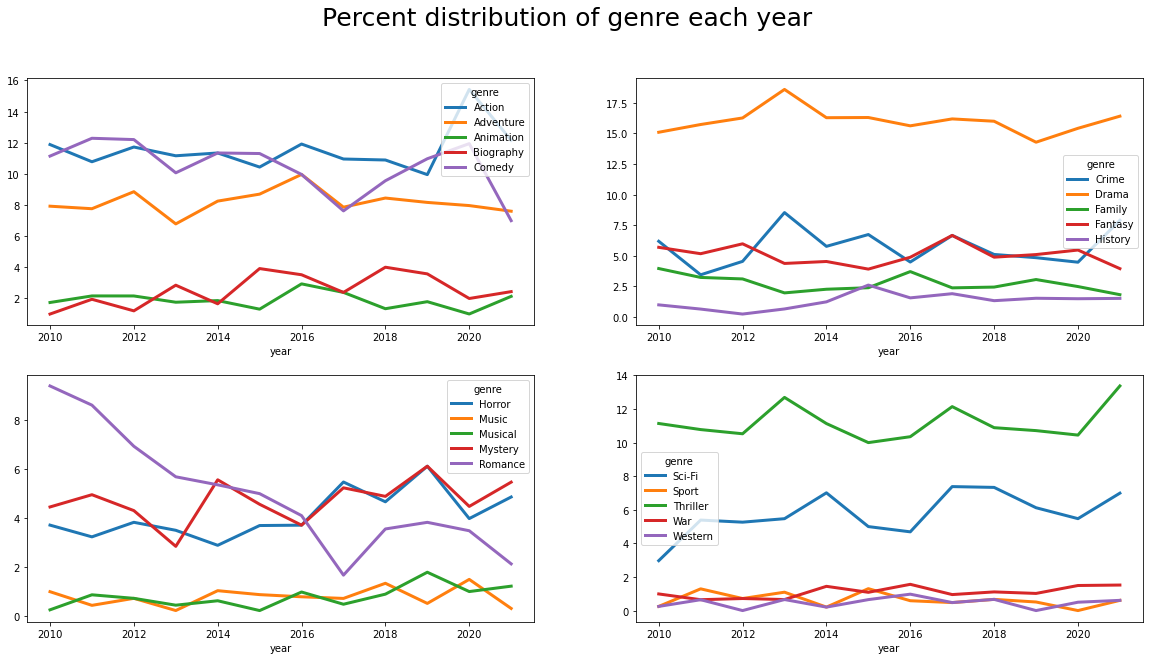

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))

percent_each_year.iloc[:,0:5].plot(ax=axes[0,0],linewidth=3.0)
percent_each_year.iloc[:,5:10].plot(ax=axes[0,1],linewidth=3.0)
percent_each_year.iloc[:,10:15].plot(ax=axes[1,0],linewidth=3.0)
percent_each_year.iloc[:,15:20].plot(ax=axes[1,1],linewidth=3.0)

fig.suptitle('Percent distribution of genre each year',fontsize=25)

plt.show()

Sau khi quan sát biểu đồ trên ta kết luận được như sau:

Phim đang trở nên phổ biến là Sci-Fi và Horror

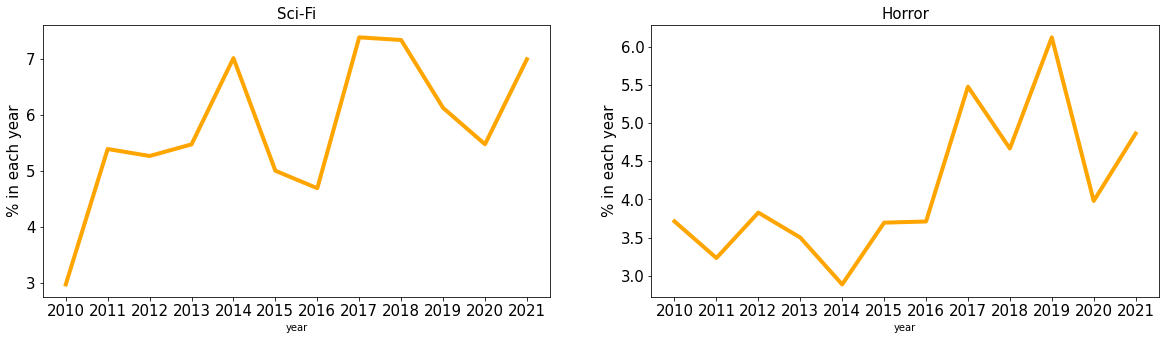

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))

percent_each_year.loc[:,'Sci-Fi'].plot(ax=axes[0],color="orange",linewidth=4.0)
percent_each_year.loc[:,'Horror'].plot(ax=axes[1],color="orange",linewidth=4.0)


axes[0].set_ylabel('% in each year',fontweight =300, fontsize = 15)
axes[0].set_title('Sci-Fi',fontweight =500, fontsize = 15)

axes[1].set_ylabel('% in each year',fontweight =300, fontsize = 15)
axes[1].set_title('Horror',fontweight =500, fontsize = 15)
plt.sca(axes[0])
plt.yticks(fontsize=15)
plt.xticks(range(2010,2022),fontsize=15)

plt.sca(axes[1])
plt.yticks(fontsize=15)
plt.xticks(range(2010,2022),fontsize=15)
plt.show()

Phim đang trở nên lạc hậu là Romance và Fantasy

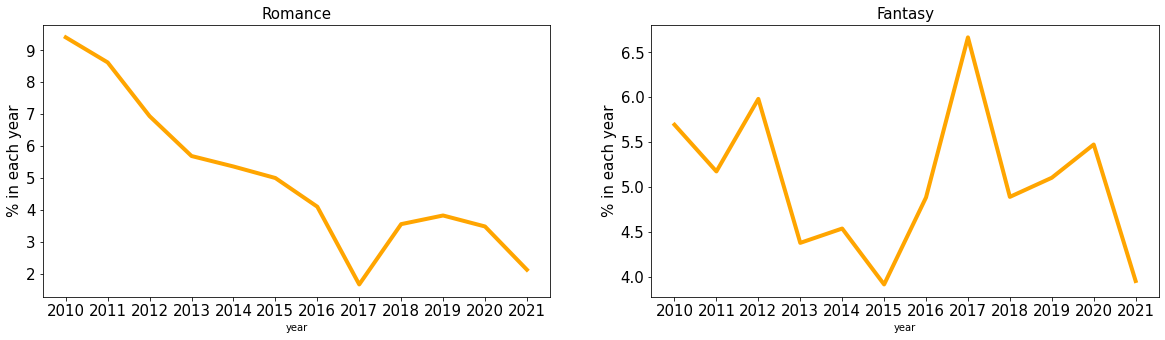

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,5))

percent_each_year.loc[:,'Romance'].plot(ax=axes[0],color="orange",linewidth=4.0)
percent_each_year.loc[:,'Fantasy'].plot(ax=axes[1],color="orange",linewidth=4.0)


axes[0].set_ylabel('% in each year',fontweight =300, fontsize = 15)
axes[0].set_title('Romance',fontweight =500, fontsize = 15)

axes[1].set_ylabel('% in each year',fontweight =300, fontsize = 15)
axes[1].set_title('Fantasy',fontweight =500, fontsize = 15)
plt.sca(axes[0])
plt.yticks(fontsize=15)
plt.xticks(range(2010,2022),fontsize=15)

plt.sca(axes[1])
plt.yticks(fontsize=15)
plt.xticks(range(2010,2022),fontsize=15)
plt.show()

Các thể loại phim khác thì chưa thể kết luận trên bộ dữ liệu này được 

### Câu 2: Thời lượng bộ phim đang trở nên lâu hơn?

**Mô tả câu hỏi:** Ngoài các yếu tố như nội dung, diễn viên, thể loại,... thì thời lượng bộ phim cũng có ảnh hưởng đến chất lượng của một bộ phim. Chất lượng phim qua từng năm đang cải thiện rõ rệt, vậy thời lượng phim thay đổi như thế nào?

**Lợi ích:** Các nhà làm phim biết được khoảng thời gian phù hợp cho từng loại phim, từ đó sản xuất ra những bộ phim chất lượng

**Trả lời**

- Bước 1: Phân tích thời lượng phim trung bình mỗi năm và đưa ra giả thuyết về lý do
- Bước 2: Làm rõ giả thuyết đó
- Bước 3: Phân tích của thể loại dựa vào thời lượng phim

Bước 1: Phân tích thời lượng phim trung bình mỗi năm và đưa ra giả thuyết về lý do

In [41]:
#remove some row have null
new_df = df[df['runtime'].notnull() & df['gross'].notnull() & df['budget'].notnull()]

In [42]:
runtime_by_year = new_df.groupby('year')['runtime'].mean()

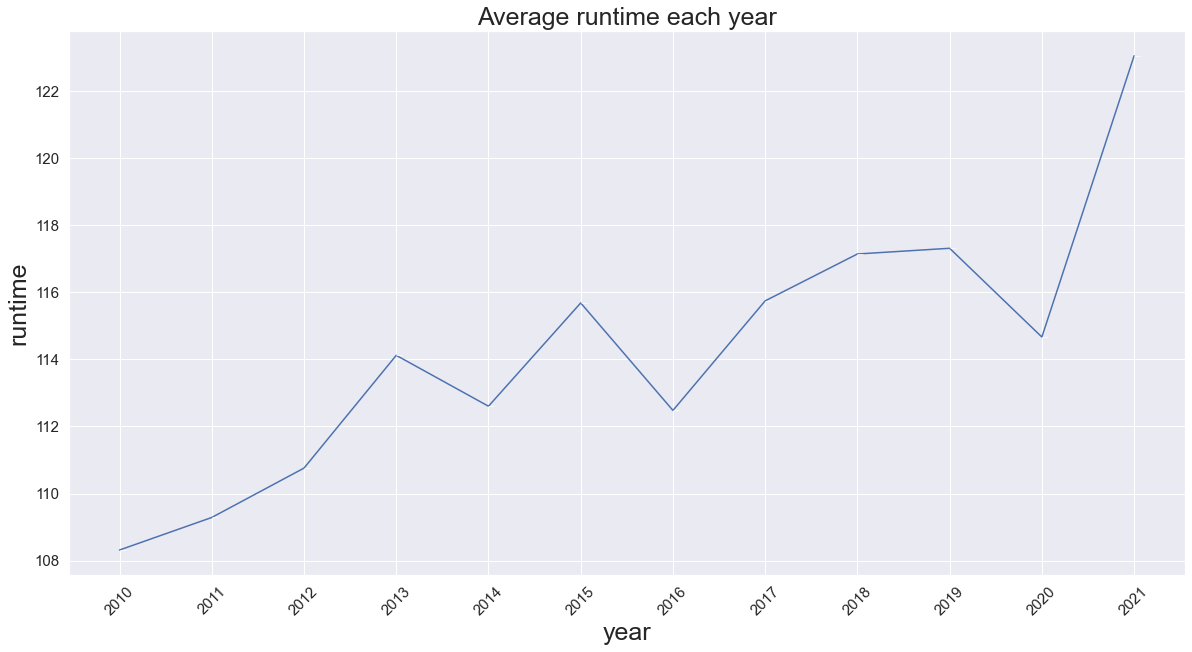

In [43]:
plt.figure(figsize=(20,10))

sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(range(2010,2022))
sns.lineplot(data=runtime_by_year,marker=True)
plt.ylabel('runtime',fontsize=25)
plt.xlabel('year',fontsize=25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15,rotation = 45)
plt.title('Average runtime each year',fontsize = 25)
plt.show()

Thời gian trung bình qua từng năm tăng.

Dự đoán: Người xem thích xem lâu hơn để được thỏa mãn và từ đó bộ phim có lợi nhuận cao. Thời gian lâu cũng giúp phim diễn đạt được rõ nội dung hơn từ đó tăng chất lượng của phim

##### Bước 2: Làm rõ giả thuyết đó

Lấy ra những phim có điểm imdb, lợi nhuận và số lượng người bình chọn cao nhất từng năm. Sau đó tính thời lượng trung bình theo năm

In [44]:
#Get top highest movie in attribute each year
def getDf(att,type_):
    if type_ == "best":
        q_rates = new_df.groupby('year')[att].quantile(0.75)
    else:
        q_rates = new_df.groupby('year')[att].quantile(0.25)
    
    top_df = new_df.copy()
    top_df[att] = top_df.apply(lambda row : selectTop(row[att], row['year'],q_rates,type_),axis = 1)
    top_df = top_df[top_df[att] != 0.0]
    return top_df

#select top if greater than q3
def selectTop(value, year,q_,type_):
    if type_ == "best":
        if value >= q_[year]:
            return value
        else:
            return 0
    else:
        if value <= q_[year]:
            return value
        else:
            return 0
    
    
top_movie_rates = getDf('imdb_rate','best').groupby('year')['runtime'].mean()

top_movie_gross = getDf('gross','best').groupby('year')['runtime'].mean()

top_movie_nvote = getDf('nvote','best').groupby('year')['runtime'].mean()


In [45]:
#concat 3 dataframe
runtime_top_movie = pd.concat({"Imdb rate": top_movie_rates,
                         "Gross": top_movie_gross,
                         "Nvote": top_movie_nvote},
                         axis=1, levels=None)
runtime_top_movie

,Imdb rate,Gross,Nvote
year,,,
2010,114.642857,113.464286,114.392857
2011,116.702703,113.628571,116.057143
2012,127.058824,116.741935,119.774194
2013,125.767442,119.555556,125.333333
2014,125.166667,123.093750,124.531250
2015,127.741935,117.066667,129.200000
2016,121.789474,118.500000,119.735294
2017,121.000000,122.592593,124.481481
2018,121.642857,120.629630,124.222222


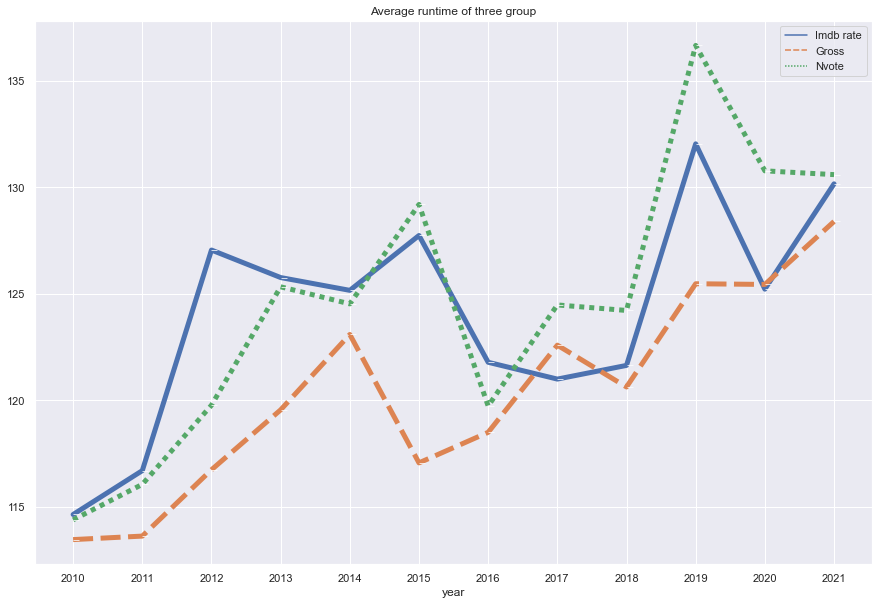

In [46]:
plt.figure(figsize=(15,10))

sns.set(rc={'figure.figsize':(15,5)})

sns.lineplot(data=runtime_top_movie,marker=True, estimator=None, linewidth=5)
plt.title('Average runtime of three group')
plt.xticks(range(2010,2022))
plt.show()

Thời gian của 3 loại đều tăng qua từng năm chứng tỏ người xem đang dần thích các phim có thời lượng lâu hơn. Và với các phim có thời lượng lâu thì doanh thu của phim của cải thiện

Ở năm 2020 có một điểm trủng. Có thể năm này là năm diễn ra dịch bệnh, ảnh hưởng đến nền kinh tế và nghành làm phim

In [47]:
budget_df = new_df.groupby('year')['budget'].sum()
gross_df = new_df.groupby('year')['gross'].sum()

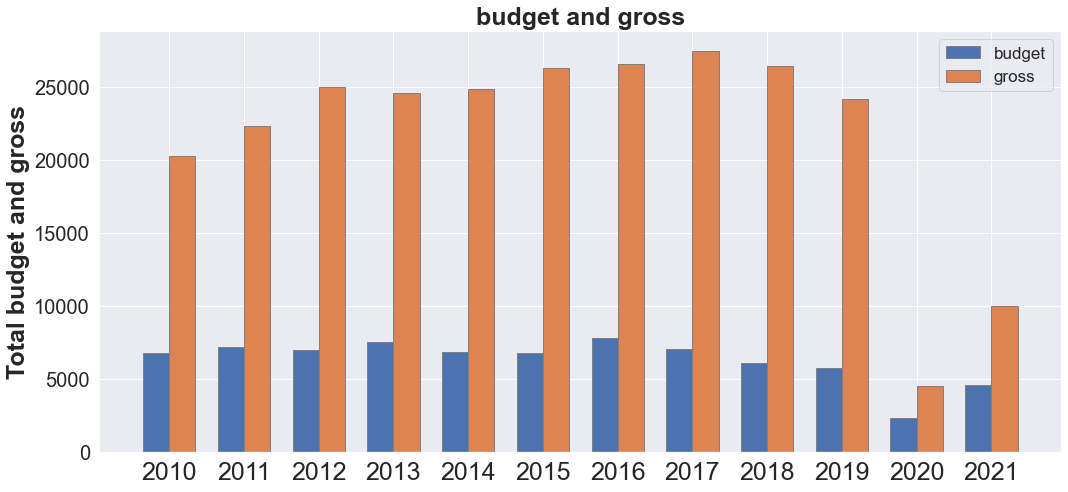

In [48]:
width = 0.35
fig, ax = plt.subplots(figsize=(15, 7))

labels = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
x = np.arange(len(labels))

rects1 = ax.bar(x - width/2, budget_df, width, edgecolor ='grey', label="budget")
rects2 = ax.bar(x + width/2, gross_df, width, edgecolor ='grey', label="gross")

ax.set_ylabel('Total budget and gross',fontweight ='bold', fontsize = 25)
ax.set_title('budget and gross',fontweight ='bold', fontsize = 25)
plt.yticks(fontsize=20)

plt.xticks(fontsize = 25)
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()
plt.legend(prop={'size': 17})
plt.show()

Doanh thu và lợi nhuận ở năm 2020 và năm 2021 thấp hơn hẳn so với các năm khác. CO-VID19 đã ảnh hưởng rất nhiều đến giai đoạn này

##### Bước 3: Phân tích của thể loại dựa vào thời lượng phim

In [49]:
genre_on_runtime = new_df.explode('genre')

In [50]:
a = genre_on_runtime.groupby('genre')['runtime'].mean()


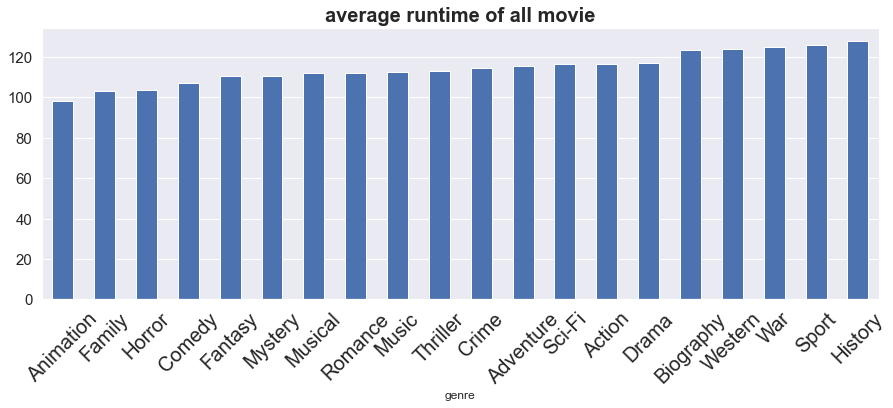

In [51]:
a.sort_values().plot(kind="bar")

plt.xticks(fontsize = 20, rotation=45)
plt.title('average runtime of all movie',fontweight ='bold', fontsize = 20)
plt.yticks(fontsize = 15)
plt.grid(axis = 'x')
plt.show()

Thời lượng phim từng năm 

### 3. Quy tắc Pareto có đúng với các công ty sản xuất phim hay không?

### a. Preprocess

**Danh sách các công ty**

In [52]:
companies = pd.DataFrame(df["company"].explode().unique(), columns = ["company"])
companies

,company
0,Warner Bros.
1,Legendary Entertainment
2,Syncopy
3,Paramount Pictures
4,DC Entertainment
...,...
1481,Head Gear Films
1482,Kreo Films FZ
1483,Metrol Technology
1484,10th Street Entertainment


In [53]:
def get_company_info(name, df):
    sub_df = df.loc[df['company'].apply(lambda x: name in x)]
    sub_df['num_company'] = sub_df['company'].apply(lambda x: len(x))
    sub_df['gross_one_company'] = sub_df['gross'] / sub_df['num_company']
    sub_df['budget_one_company'] = sub_df['budget'] / sub_df['num_company']
    total_budget = sub_df['budget_one_company'].sum()
    total_gross = sub_df['gross_one_company'].sum()
    total_profit = total_gross - total_budget
    nvote = sub_df['nvote'].sum()
    num_film = len(sub_df)
    ratings = sub_df['imdb_rate'].mean()
    average_profit = total_profit / num_film
    genres = sub_df['genre'].explode().unique()
    if num_film >= 3:
        best_film_row = sub_df.sort_values(by = 'gross', ascending = False).head(3)
        best_film = best_film_row['name'].values
    else:
        best_film_row = sub_df.sort_values(by = 'gross', ascending = False).head(num_film)
        best_film = best_film_row['name'].values
    highest_gross = sub_df['gross_one_company'].max()
    
    return num_film, ratings, nvote, total_budget, total_gross, highest_gross, total_profit, average_profit, best_film, genres

In [54]:
company_profile = []
for c in companies['company']:
    company_profile.append(get_company_info(c, df))

In [55]:
companies[['num_film', 'ratings', 'nvote', 'total_budget', 
           'total_gross', 'highest_gross',
           'total_profit', 'average_profit',
           'best_film', ' genres']] = company_profile
companies

,company,num_film,ratings,nvote,total_budget,total_gross,highest_gross,total_profit,average_profit,best_film,genres
0,Warner Bros.,89,6.747191,30619244,3154.081667,9880.230098,488.535191,6726.148431,75.574701,"[Harry Potter và Bảo Bối Tử Thần: Phần 2, Aqua...","[Action, Adventure, Sci-Fi, Thriller, Drama, C..."
1,Legendary Entertainment,40,6.605,15305777,1552.0,5116.298126,557.179148,3564.298126,89.107453,"[Thế Giới Khủng Long, Thế Giới Khủng Long: Vươ...","[Action, Adventure, Sci-Fi, Thriller, Drama, C..."
2,Syncopy,4,7.75,4303234,230.0,799.071344,278.949367,569.071344,142.267836,"[Kẻ Đánh Cắp Giấc Mơ, Người Đàn Ông Thép, Cuộc...","[Action, Adventure, Sci-Fi, Thriller, Drama, H..."
3,Paramount Pictures,76,6.492105,22170880,2259.083333,7572.817273,759.407758,5313.733939,69.917552,"[Avengers: Biệt Đội Siêu Anh Hùng, Người Sắt 3...","[Adventure, Drama, Sci-Fi, Action, Mystery, Th..."
4,DC Entertainment,14,6.685714,5922807,727.25,1810.002082,382.842798,1082.752082,77.339434,"[Aquaman: Đế Vương Atlantis, Kỵ Sĩ Bóng Đêm Tr...","[Action, Drama, Adventure, Fantasy, Sci-Fi, Co..."
...,...,...,...,...,...,...,...,...,...,...,...
1481,Head Gear Films,1,6.8,50838,1.0,0.398123,0.398123,-0.601877,-0.601877,[Vụ Mất Tích],"[Crime, Drama, Horror, Mystery, Thriller]"
1482,Kreo Films FZ,1,6.8,50838,1.0,0.398123,0.398123,-0.601877,-0.601877,[Vụ Mất Tích],"[Crime, Drama, Horror, Mystery, Thriller]"
1483,Metrol Technology,1,6.8,50838,1.0,0.398123,0.398123,-0.601877,-0.601877,[Vụ Mất Tích],"[Crime, Drama, Horror, Mystery, Thriller]"
1484,10th Street Entertainment,1,7.0,50752,0.0,0.0,NaN,0.0,0.0,[Mötley Crüe: Ban Nhạc Tai Tiếng],"[Biography, Comedy, Drama, Music]"


### b. Answer

In [57]:
companies_cp = companies.sort_values(by = 'total_gross', ascending = False)
companies_cp = companies_cp.reset_index()
companies_cp['cumperc'] = companies_cp['total_gross'].cumsum()/companies_cp['total_gross'].sum()*100

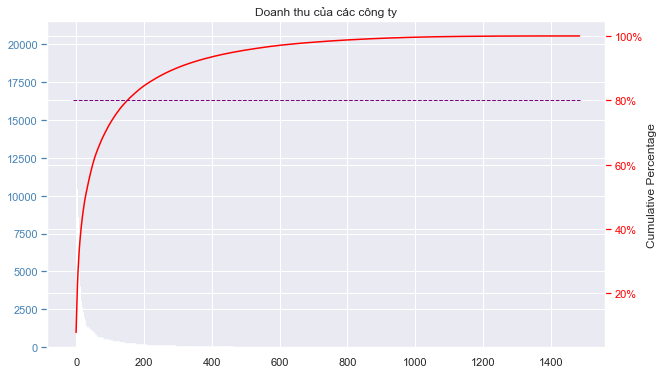

In [58]:
color1 = 'steelblue'
color2 = 'red'
line_size = 2

#create basic bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(companies_cp.index, companies_cp['total_gross'], color=color1)
#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(companies_cp.index, companies_cp['cumperc'], color=color2, ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

ax2.hlines(y=80, xmin= -10, xmax=len(companies_cp), colors='purple', linestyles='--', lw=1)
ax2.set_ylabel("Cumulative Percentage")
plt.title("Doanh thu của các công ty")

#display Pareto chart
plt.show()

Nhận xét:

- Ta thấy biểu đồ doanh thu của các công ty phân phối theo [Pareto chart](https://en.wikipedia.org/wiki/Pareto_chart). 

- Chỉ cần chưa tới 200 công ty đã có doanh thu chiếm 80% tổng doanh thu toàn ngành.

In [59]:
len_top_20 = int(len(companies) * 0.2)
top20_gross = companies.sort_values(by = 'total_gross', ascending = False).head(len_top_20)

top_20_ratio = top20_gross['total_gross'].sum() / companies['total_gross'].sum() * 100
top_20_ratio = round(top_20_ratio, 2)
other = 100 - top_20_ratio

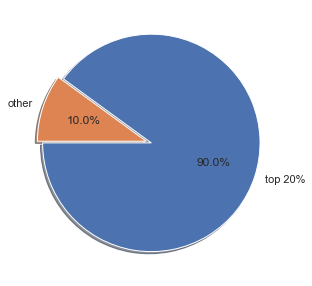

In [60]:
plt.pie([top_20_ratio, other], explode = ( 0, 0.05) ,labels = ["top 20%", 'other'], autopct='%1.1f%%',
        shadow=True, startangle=180)
plt.show()

=> Doanh số của toàn ngành được quyết định bởi một số ít công ty.

**Kết luận:** Quy tắc Pareto áp dụng được với các công ty sản xuất phim. Ta có thể phân bổ phần lớn nguồn vốn của mình đầu tư vào những hãng phim hoạt động hiệu quả nhất thay vì chia đều cho hầu hết các hãng phim khác.

## 4. Danh sách các hãng phim tiềm năng?

Khi một hãng phim đã ra mắt được một vài bộ phim và được sự công nhận của công chúng( được đánh giá cao, được nhiều người biết đến) thì các phim tiếp theo của họ cũng sẽ dễ dàng được đón nhận.

Ta sẽ xét dự trên các tiêu chí:
- Mức độ phổ biến ( ta sẽ đánh giá `num_votes`). Num_votes càng cao chứng tỏ film của công ty này sản xuất càng được quan tâm
- Đánh giá của khán giả đối với phim (`ratings`). Ta sẽ chọn các hãng có mức đánh giá lớn hơn 7.

In [61]:
good_companies = companies.loc[companies['ratings'] > 7]
good_companies = good_companies.sort_values(by = "nvote", ascending = False).head(15)
good_companies = good_companies.set_index('company')

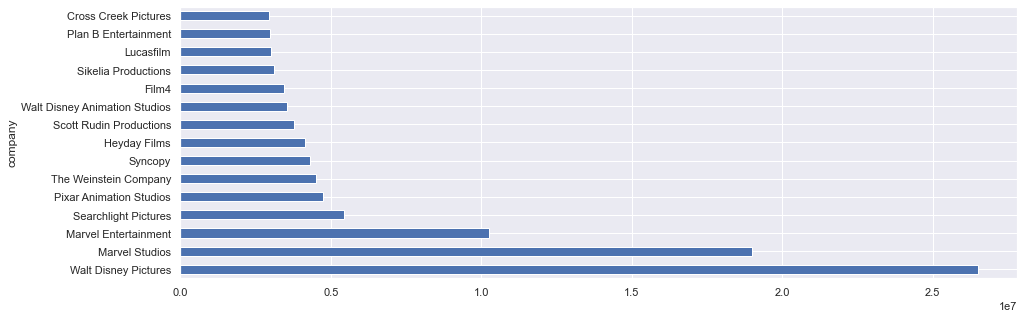

In [62]:
good_companies['nvote'].plot.barh();

In [63]:
with pd.option_context('display.max_colwidth', None): 
    display(good_companies[['num_film', 'ratings', 'nvote', 'total_gross', 'best_film', ' genres']])

,num_film,ratings,nvote,total_gross,best_film,genres
company,,,,,,
Walt Disney Pictures,70,7.157143,26494327,20472.858629,"[Avengers: Hồi Kết, Chiến Tranh Giữa Các Vì Sao Tập 7: Thần Lực Thức Tỉnh, Vua Sư Tử]","[Action, Adventure, Comedy, Sci-Fi, Drama, Thriller, Animation, Family, Fantasy, Musical, Music, Mystery, Crime, Romance, Western, Sport, Biography, Horror, History]"
Marvel Studios,25,7.408,18992643,10442.108353,"[Avengers: Hồi Kết, Avengers: Cuộc Chiến Vô Cực, Người Nhện: Không Còn Nhà]","[Action, Adventure, Sci-Fi, Comedy, Drama, Fantasy, Thriller]"
Marvel Entertainment,17,7.0,10245212,3041.926043,"[Venom, Deadpool 2, Deadpool]","[Action, Adventure, Comedy, Sci-Fi, Fantasy, Thriller, Drama, Animation, Family, Horror, Mystery]"
Searchlight Pictures,25,7.22,5446702,568.25055,"[Thiên Nga Đen, Người Đẹp và Thủy Quái, Tình thân]","[Adventure, Comedy, Crime, Drama, Thriller, Fantasy, Romance, War, Biography, History, Action, Horror, Mystery, Sport]"
Pixar Animation Studios,14,7.442857,4742588,4474.973445,"[Gia Đình Siêu Nhân 2, Câu Chuyện Đồ Chơi 4, Câu Chuyện Đồ Chơi 3]","[Animation, Adventure, Comedy, Family, Fantasy, Drama, Music, Mystery, Action, Sci-Fi, Sport]"
The Weinstein Company,15,7.346667,4511687,819.609392,"[Nhà Vua Nói Lắp, Hành Trình Django, Tình Yêu Tìm Lại]","[Drama, Western, Comedy, Romance, Biography, History, Crime]"
Syncopy,4,7.75,4303234,799.071344,"[Kẻ Đánh Cắp Giấc Mơ, Người Đàn Ông Thép, Cuộc Di Tản Dunkirk]","[Action, Adventure, Sci-Fi, Thriller, Drama, History, War]"
Heyday Films,8,7.4875,4139572,2054.486356,"[Harry Potter và Bảo Bối Tử Thần: Phần 2, Harry Potter và Bảo Bối Tử Thần: Phần 1, Sinh Vật Huyền Bí và Nơi Tìm Ra Chúng]","[Adventure, Family, Fantasy, Mystery, Drama, Sci-Fi, Thriller, Comedy, Romance]"
Scott Rudin Productions,14,7.057143,3762376,469.291375,"[True Grit: Báo Thù, Cô Gái Có Hình Xăm Rồng, Mạng Xã Hội]","[Biography, Drama, Crime, Mystery, Thriller, Action, Sport, Western, Adventure, Horror, Sci-Fi, Comedy, Animation, Romance]"


## 5. Chi phí trung bình để sản xuất một bộ phim theo từng thể loại là bao nhiêu, và tỉ suất lợi nhuận của từng thể loại?

### a. Pre-process

In [64]:
def get_genre_info(name, df):
    sub_df = df.loc[df['genre'].apply(lambda x: name in x)]
    total_budget = sub_df['budget'].sum()
    total_gross = sub_df['gross'].sum()
    total_profit = total_gross - total_budget
    num_film = len(sub_df)
    average_profit = total_profit / num_film
    if num_film >= 3:
        best_film_row = sub_df.sort_values(by = 'gross', ascending = False).head(3)
        best_film = best_film_row['name'].values
    else:
        best_film_row = sub_df.sort_values(by = 'gross', ascending = False).head(num_film)
        best_film = best_film_row['name'].values
    highest_gross = sub_df['gross'].max()
    
    return num_film, total_budget, total_gross, highest_gross, total_profit, average_profit, best_film

In [65]:
genres = pd.DataFrame(df["genre"].explode().unique(), columns = ["genre"])
genres_profile = []
for c in genres['genre']:
    genres_profile.append(get_genre_info(c, df))
    
genres[['num_film', 'total_budget', 
           'total_gross', 'highest_gross',
           'total_profit', 'average_profit',
           'best_film']] = genres_profile
genres = genres.set_index('genre')

In [66]:
genres

,num_film,total_budget,total_gross,highest_gross,total_profit,average_profit,best_film
genre,,,,,,,
Action,567,46771.153466,143423.209338,2797.501328,96652.055872,170.46218,"[Avengers: Hồi Kết, Chiến Tranh Giữa Các Vì Sa..."
Adventure,411,46185.366,163441.884771,2797.501328,117256.518771,285.295666,"[Avengers: Hồi Kết, Chiến Tranh Giữa Các Vì Sa..."
Sci-Fi,287,27624.175,95910.47178,2797.501328,68286.29678,237.931348,"[Avengers: Hồi Kết, Chiến Tranh Giữa Các Vì Sa..."
Thriller,557,22989.174418,72118.639071,1515.341399,49129.464653,88.203707,"[Quá Nhanh Quá Nguy Hiểm 7, Quá Nhanh Quá Nguy..."
Drama,802,24633.722579,78759.602432,2797.501328,54125.879853,67.488628,"[Avengers: Hồi Kết, Vua Sư Tử, Nữ Hoàng Băng G..."
Western,24,1347.53,2732.912827,532.950503,1385.382827,57.724284,"[Người Về Từ Cõi Chết, Hành Trình Django, Kỵ S..."
Biography,129,3708.943,12406.289965,910.809311,8697.346965,67.421294,[Bohemian Rhapsody: Huyền Thoại Ngôi Sao Nhạc ...
Comedy,522,24780.339,89791.889149,1450.026933,65011.550149,124.5432,"[Nữ Hoàng Băng Giá 2, Nữ Hoàng Băng Giá, Gia Đ..."
Crime,286,9746.432,31709.723149,1515.341399,21963.291149,76.794724,"[Quá Nhanh Quá Nguy Hiểm 7, Quá Nhanh Quá Nguy..."


### b. answer

In [67]:
genres['ros'] = genres['total_profit'] / genres['total_budget']
genres['avg_budget'] = genres['total_budget'] / genres['num_film']
genres['avg_profit'] = genres['total_profit'] / genres['num_film']

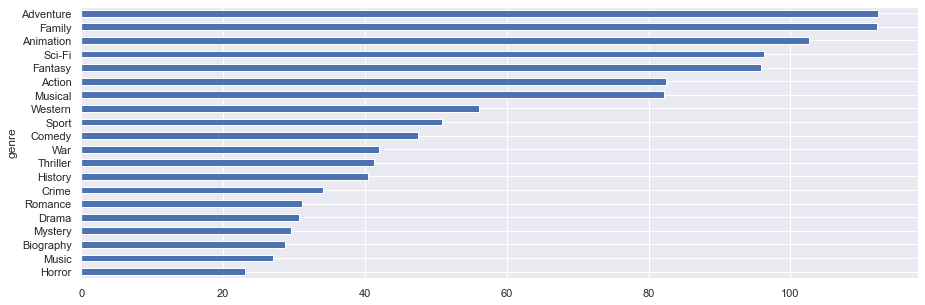

In [68]:
genres['avg_budget'].sort_values().plot(kind='barh');

Mỗi thể loại đều có mức chi phí khác nhau.
- **Musical, Animation, Fantasy, Family, Sci-fi, Adventure, Action** thường là những phìm cần đầu tư nhiều cho bối cảnh, kỉ xảo,... nên chi phí vượt trội so với các thể loại khác

In [69]:
genres_high_budget = genres.loc[genres['avg_budget'] > 60]
genres_low_budget = genres.loc[genres['avg_budget'] < 60]

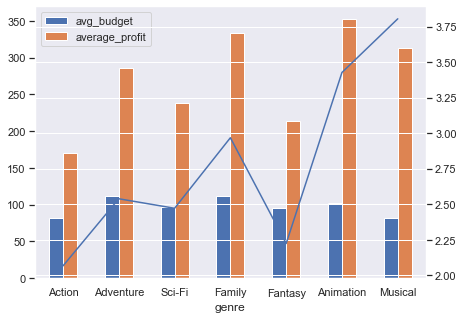

In [70]:
ax = genres_high_budget[['avg_budget', 'average_profit']].plot(kind='bar', figsize = (7, 5))
genres_high_budget['ros'].plot(secondary_y=True, xlim=ax.get_xlim()) ;

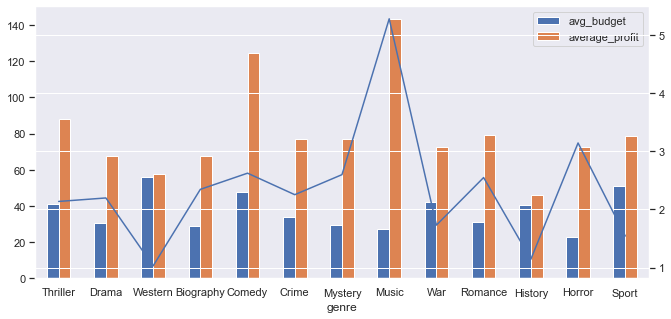

In [71]:
ax = genres_low_budget[['avg_budget', 'average_profit']].plot(kind='bar', figsize = (11, 5))
genres_low_budget['ros'].plot(secondary_y=True, xlim=ax.get_xlim()) ;

## 6. Tháng nào có số lượng phim phát hành nhiều nhất, tháng nào có doanh thu trung bình cao nhất? So sánh doanh thu trung bình của phim ra mắt trong `mùa phim` và phim ra mắt vào các tháng khác.

Ta xem sơ qua dữ liệu của cột `release_date`

df.release_date.head(10)

Sau đó, trích thông tin tháng phát hành phim ra:

In [72]:
month_release = df.release_date.dt.month

Đếm số lượng phim được phát hành trong từng tháng

In [73]:
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

Xem biểu đồ số lượng phim được phát hành trong các tháng để tìm `mùa phim`

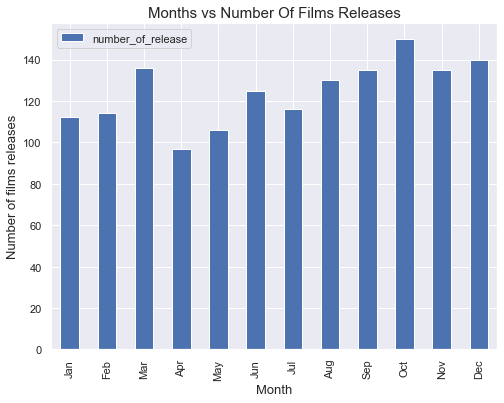

In [74]:
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))
plt.title('Months vs Number Of Films Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of films releases',fontsize = 13)
sns.set_style("darkgrid")

Từ biểu đồ này, ta thấy được dịp `cuối năm` - tức từ `tháng 9 đến tháng 12` thì số lượng phim được phát hành là nhiều và đồng đều nhất, `tháng 3` tuy cũng có số lượng phim nhiều tuy nhiên các tháng kế thì không có sự tương đồng. Vậy, `quý cuối năm` sẽ là `mùa phim`.

In [75]:
# Xem tháng min-max
print(df.release_date.min(), df.release_date.max())

2010-01-08 00:00:00 2021-12-31 00:00:00


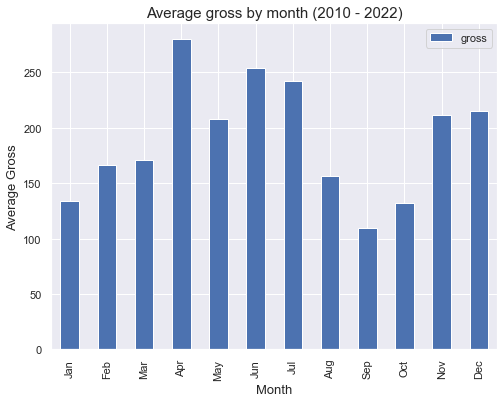

In [76]:
month_release = pd.DataFrame(month_release)
month_release.rename(columns = {'release_date':'release_month'},inplace=True)
month_release['gross'] = df['gross']

mean_gross  = month_release.groupby('release_month').mean()
mean_gross['month'] = months

mean_gross.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

plt.title('Average gross by month (2010 - 2022)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Gross',fontsize = 13)
sns.set_style("darkgrid")

Qua kết quả ở trên, `tháng 4` là tháng có doanh thu trung bình cao nhất. Tuy nhiên, tháng 4 lại `không nằm trong mùa phim`.

Thú vị hơn nữa, `tháng 4 và tháng 7` tuy có số lượng phim ra mắt thấp nhất nhưng lại đem về doanh thu thuộc hàng cao nhất trong các tháng.

Có thể thấy, phim được ra mắt trong `mùa phim` có vẻ khó đem lại lợi nhuận hơn khi mà có rất nhiều phim cạnh tranh ra mắt cùng lúc? Nếu có dịp chúng ta sẽ đào sâu hơn về vấn đề này.

## 7. Phim được gán nhãn nào thu hút nhiều lượt đánh giá nhất? Phim chứa nhãn thu hút nhất thuộc thể loại gì và nên được phát hành vào tháng nào trong năm?

Đầu tiên, ta xem số lượt đánh giá cho từng nhãn phim và điểm trung bình của chúng:

In [77]:
votes_per_cert = pd.DataFrame(df.groupby('certificate')['nvote'].sum())
votes_per_cert['imdb_rate'] = df.groupby('certificate')['imdb_rate'].mean()
votes_per_cert = votes_per_cert.sort_values(by=['nvote'], ascending=False).reset_index()
votes_per_cert

,certificate,nvote,imdb_rate
0,R,89780129,6.702457
1,PG-13,58648304,6.606376
2,C16,39824331,6.531953
3,C13,38824047,6.768421
4,C18,25876081,6.730328
5,P,22260147,6.909195
6,PG,9587472,6.693651
7,Unrate,8539868,6.876768
8,(Banned),1671954,6.044444
9,G,649232,6.566667


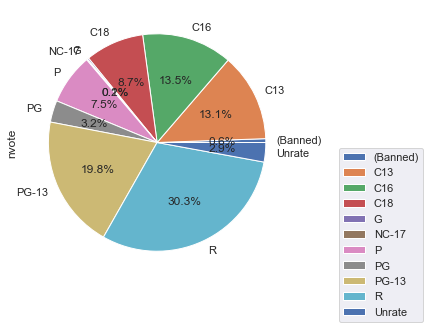

In [78]:
votes_per_cert.groupby(['certificate']).sum().plot(kind='pie', y='nvote', figsize=(5,5), autopct='%1.1f%%').legend(loc='best', bbox_to_anchor=(1, 0., 0.5, 0.5));

Ta thấy, `nhãn R (Restricted) – Thanh thiếu niên dưới 17 tuổi không được xem phim nếu không có sự đồng ý của người lớn.` thu hút mọi người đánh giá nhiều nhất. Thậm chí nhãn này còn bỏ xa nhãn đứng thứ 2 là PG-13 đến hơn 10% (gần 30 triệu lượt đánh giá). Đều này cho thấy mọi người có hứng thú hơn hết với các bộ phim được gán nhãn R.

**Chúng ta hãy cùng tìm hiểu xem phim có chứa nhãn R nên được phát hành vào tháng nào**

Đầu tiên, ta sẽ lấy các dữ liệu cần thiết:
* Tên phim
* Tháng phát hành
* Doanh thu

In [79]:
R_release = pd.DataFrame(df.loc[df['certificate'] == 'R', 'name'])
R_release['release_month'] = df.loc[df['certificate'] == 'R', 'release_date'].dt.month
R_release['gross'] = df.loc[df['certificate'] == 'R', 'gross']
R_release['genre'] = df.loc[df['certificate'] == 'R', 'genre']
R_release = R_release.sort_values(by=['release_month'], ascending=True)
R_release

,name,release_month,gross,genre
441,Lễ Tình Nhân Buồn,1,15.440333,"[Drama, Romance]"
730,Lối Sống Đồi Trụy 2,1,41.681746,"[Comedy, Drama]"
1165,Năm Bạo Lực Nhất,1,12.007070,"[Action, Crime, Drama, Thriller]"
745,Phi Vụ Ngầm,1,96.262212,"[Action, Crime, Drama, Thriller]"
163,Room,1,35.401758,"[Drama, Thriller]"
...,...,...,...,...
131,Săn Tiền Kiểu Mỹ,12,251.171807,"[Crime, Drama]"
1224,Sisters,12,105.011053,[Comedy]
775,Đi Tìm Công Lý,12,15.661554,"[Action, Crime, Drama, Thriller]"
805,Thu Nhỏ,12,55.003890,"[Drama, Fantasy, Sci-Fi]"


Ta tìm xem tổng số lượng phim được phát hành theo từng tháng

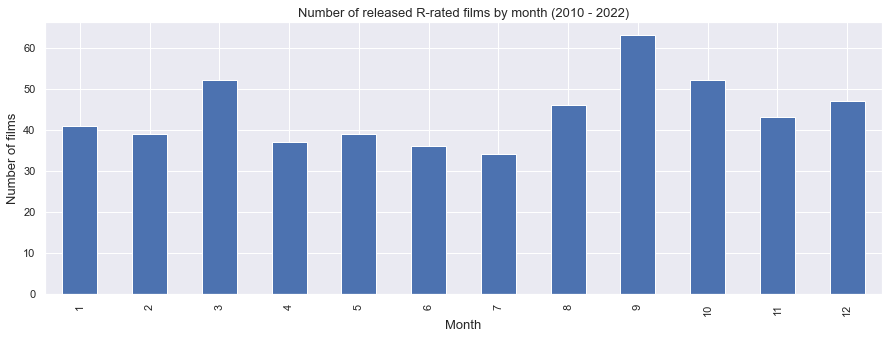

In [80]:
R_release['release_month'].value_counts(sort=False).plot.bar();
plt.title('Number of released R-rated films by month (2010 - 2022)', fontsize = 13)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of films',fontsize = 13)
sns.set_style("darkgrid")

Từ đây ta thấy được, phim nhãn R thường được phát hành vào tháng 9.

Tiếp theo, ta tìm trung bình doanh thu theo tháng của các bộ phim nhãn R

In [81]:
R_mean_gross  = R_release.groupby('release_month').mean().reset_index()
R_mean_gross

,release_month,gross
0,1,74.241734
1,2,128.517048
2,3,74.616599
3,4,61.247215
4,5,92.722876
5,6,69.887973
6,7,57.948575
7,8,72.494969
8,9,87.873849
9,10,56.176730


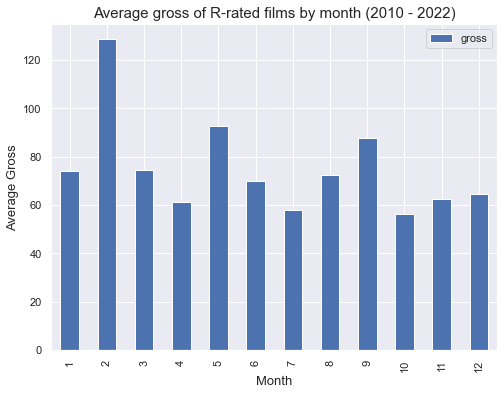

In [82]:
R_mean_gross.plot(x='release_month',kind='bar',figsize = (8,6),fontsize=11)

plt.title('Average gross of R-rated films by month (2010 - 2022)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Gross',fontsize = 13)
sns.set_style("darkgrid")

Trái ngược với số lượng phim được phát hành áp đảo của tháng 9, tháng 2 có ít phim được phát hành nhưng lại đem lại lợi nhuận cao hơn hẳn so với các tháng khác trong năm. Phải chăng là vì các bộ phim được phát hành vào dịp Valentine's - Ngày lễ tình yêu?

Để kiểm chứng điều này, ta sẽ cùng khám phá xem thể loại phim nào được gán nhãn R và phát hành vào tháng 2 nhiều nhất. (Một bộ phim có thể có nhiều thể loại)

In [83]:
R_rated_in_2nd_month = R_release.loc[R_release['release_month'] == 2, 'genre']
R_rated_in_2nd_month.head(10)

771             [Action, Crime, Thriller]
470     [Crime, Drama, Mystery, Thriller]
464     [Crime, Drama, Mystery, Thriller]
858    [Action, Adventure, Comedy, Crime]
649           [Action, Thriller, Western]
750                   [Adventure, Horror]
391                    [Action, Thriller]
743             [Action, Crime, Thriller]
731                              [Comedy]
378                     [Comedy, Romance]
Name: genre, dtype: object

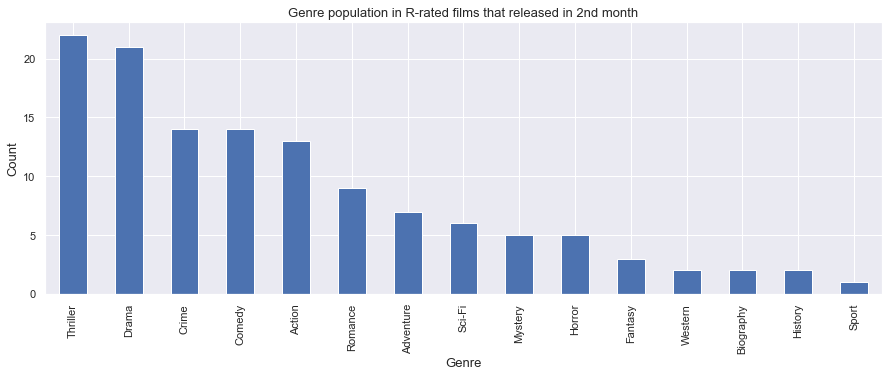

In [84]:
R_rated_in_2nd_month.explode().value_counts().plot(kind='bar');
plt.title('Genre population in R-rated films that released in 2nd month',fontsize = 13)
plt.xlabel('Genre',fontsize = 13)
plt.ylabel('Count',fontsize = 13)
sns.set_style("darkgrid")

Vậy là phim thể loại `Thriller` và `Drama` có số lượng cao nhất, rất phù hợp cho thị hiếu của tháng Valentine's.

Còn dưới đây là tổng quát các thể loại phim được gán nhãn R

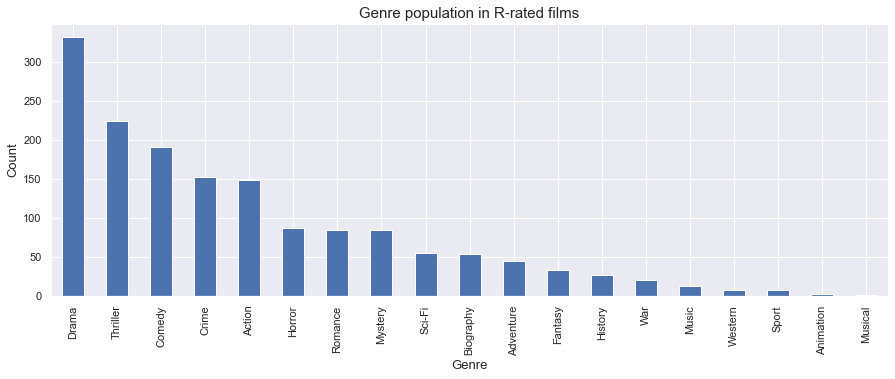

In [85]:
R_release["genre"].explode().value_counts().plot(kind='bar');
plt.title('Genre population in R-rated films',fontsize = 15)
plt.xlabel('Genre',fontsize = 13)
plt.ylabel('Count',fontsize = 13)
sns.set_style("darkgrid")

Phim thuộc thể loại `Drama` có số lượng cao nhất.

Ta có thể thấy, phim được gán nhãn R muốn đạt doanh thu cao và thu hút nhiều sự chú ý thì nên thuộc thể loại `Drama`/`Thỉlled` và phát hành vào `tháng 2`